# SD210 Machine learning - challenge

***ZHANG Bolong, WANG Yuqing, YAN Ming, ZHU Fangda***

---


<---------- For more details, please refer to our report ---------->

---
## Part 2: Analysis of features

## Loading data

In [1]:
from __future__ import division
import os
import sys
reload(sys)
sys.setdefaultencoding("utf-8")
import numpy as np
import pandas as pd
import pyfpgrowth
from matplotlib import pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import ExtraTreesClassifier

In [2]:
def funk_mask_1(d):
    " Defining a simple mask over the input data "
    columns_ext = ["OrderNumber","VariantId","CustomerId","LineItem","OrderStatuslabel","OrderTypelabel","IsOrderDirect","PayementMode","IsNouveau","Country","IsDeviceND","TotalLineItems",
                   "Quantity","UnitPMPEUR","IsSeasonAH","OrderCreationDate","OrderMonth","OrderDay","OrderWeekday","OrderShipDate","ShipTime","OrderNumCustomer","BillingPostalCode","CountryISOCode",
                  "BirthDate","OrderCreationAge","IsMale","FirstOrderDate","FirstOrderTime","OrderInterval","CReturnTimes","COrderTimes","CReturnRate","ProductColorId","ProductId","ProductGender",
                  "IsProductSeasonAH","BrandId","BrandUniverse","BrandType","TypeProduct","SupplierColor","MinSize","ShoesSizeMin","MaxSize","ShoesSizeMax","CalfTurn","UpperHeight","HeelHeight",
                  "PurchasePriceHT","PriceHTRate","Subtype","IsRemovableSole","SizeAdviceDescription","VReturnTimes","VOrderTimes","VReturnRate","PCReturnTimes","PCOrderTimes","PCReturnRate",
                  "PReturnTimes","POrderTimes","PReturnRate","BReturnTimes","BOrderTimes","BReturnRate"]
    X1 = d.loc[:,[xx for xx in d.columns if xx not in columns_ext]]  
    g = lambda x: x.replace(",",".")
    #X1.UnitPMPEUR = map(np.float64,(map(g,X1.UnitPMPEUR)))   
    columns2bin = [x for x in X1.columns if X1[x].dtype == np.dtype('O')]  
    X2 = pd.get_dummies(X1.loc[:,columns2bin])    
    X1 = X1.loc[:,[xx for xx in X1.columns if xx not in columns2bin]]   
    res = pd.concat([X1,X2],axis=1)  
    res = res.fillna(0)
    return(res)

In [3]:
def funk_mask_2(d):
    " Defining a simple mask over the input data "
    columns_ext = ["OrderCreationDate","OrderNumber","VariantId", "CustomerId","OrderCreationDate","OrderShipDate","BillingPostalCode",
                   "BirthDate","OrderStatusLabel","FirstOrderDate","ProductColorId","ProductId","BrandId","CountryISOCode",
                   "UpperMaterialLabel","LiningMaterialLabel","OutSoleMaterialLabel","SupplierColor","UnitPMPEUR","MinSize","MaxSize",
                   "CalfTurn","UpperHeight","HeelHeight","PurchasePriceHT","OrderCreationAge","OrderInterval","OrderNumCustomer",
                   "TotalLineItems","Quantity","LineItem"]
    X1 = d.loc[:,[xx for xx in d.columns if xx not in columns_ext]]  
    g = lambda x: x.replace(",",".")  
    columns2bin = [x for x in X1.columns if X1[x].dtype == np.dtype('O')]  
    X2 = pd.get_dummies(X1.loc[:,columns2bin])    
    X1 = X1.loc[:,[xx for xx in X1.columns if xx not in columns2bin]]   
    res = pd.concat([X1,X2],axis=1)  
    res = res.fillna(0)
    return(res)

In [4]:
def funk_mask_3(d):
    " Defining a simple mask over the input data "
    columns_ext = ["OrderNumber","VariantId","CustomerId","LineItem","OrderStatuslabel","OrderTypelabel","IsOrderDirect","PayementMode","IsNouveau","Country","IsDeviceND","TotalLineItems",
                   "Quantity","UnitPMPEUR","IsSeasonAH","OrderCreationDate","OrderMonth","OrderDay","OrderWeekday","OrderShipDate","ShipTime","OrderNumCustomer","BillingPostalCode","CountryISOCode",
                  "BirthDate","OrderCreationAge","IsMale","FirstOrderDate","FirstOrderTime","OrderInterval","CReturnTimes","COrderTimes","CReturnRate","ProductColorId","ProductId","ProductGender",
                  "IsProductSeasonAH","BrandId","BrandUniverse","BrandType","TypeProduct","SupplierColor","MinSize","ShoesSizeMin","MaxSize","ShoesSizeMax","CalfTurn","UpperHeight","HeelHeight",
                  "PurchasePriceHT","PriceHTRate","Subtype","IsRemovableSole","SizeAdviceDescription","VReturnTimes","VOrderTimes","VReturnRate","PCReturnTimes","PCOrderTimes","PCReturnRate",
                  "PReturnTimes","POrderTimes","PReturnRate","BReturnTimes","BOrderTimes","BReturnRate"]
    X1 = d.loc[:,[xx for xx in d.columns if xx not in columns_ext]]  
    g = lambda x: x.replace(",",".")
    #X1.UnitPMPEUR = map(np.float64,(map(g,X1.UnitPMPEUR)))   
    columns2bin = [x for x in X1.columns if X1[x].dtype == np.dtype('O')]  
    X2 = pd.get_dummies(X1.loc[:,columns2bin])    
    X1 = X1.loc[:,[xx for xx in X1.columns if xx not in columns2bin]]   
    res = pd.concat([X1,X2],axis=1)  
    res = res.fillna(0)
    return(res)

In [5]:
def seperate(X):
    items_return = []
    items_not_return = []
    for i in np.arange(0, X.shape[0]):
        if(y_train.ReturnQuantityBin[i] == 0.0):
            items_return.append(i)
        else:
            items_not_return.append(i)
    return items_return, items_not_return

In [6]:
def num_return(a, b):
    n = a
    r = []
    nr = []
    label = []
    for i in np.arange(a,(b+1)):
        name = items_return.columns[i]
        label.append(name)
        r.append(items_return[name].cumsum().max()) 
        nr.append(items_not_return[name].cumsum().max())
    r = np.array(r)
    nr = np.array(nr)
    return r, nr, label

In [7]:
def transform(X):
    x_return = []
    for i in np.arange(0, X.shape[0]):
        item_return = []
        for j in np.arange(0, X.shape[1]):
            if(X.iloc[i][j] == 1.0):
                item_return.append(j)
        x_return.append(item_return)
    return x_return

In [8]:
def create_df(index):
    df = pd.DataFrame(columns=[df0.columns[index][0]], data = df0[df0.columns[index][0]])
    for i in np.arange(1, len(index)):
        df[df0.columns[index][i]] = df0[df0.columns[index][i]]
    return df

In [9]:
X_train_final = pd.read_csv("X_trainFinal.csv")
y_train = pd.read_csv("y_train.csv")

In [10]:
index_return, index_not_return = seperate(X_train_final)

In [11]:
x_train_final = funk_mask_1(X_train_final)
items_return = x_train_final.drop(index_return)
items_not_return = x_train_final.drop(index_not_return)

# Discrete data

## Gender

In [12]:
X_train_final['Gender'].count()

790413

In [13]:
X_train_final['Gender'].value_counts() 

Femme    646050
Homme    144361
NC            2
Name: Gender, dtype: int64

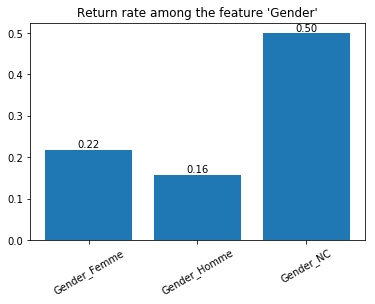

In [14]:
Gender_return, Gender_not_return, x_label = num_return(63, 65)  
x = range(len(x_label))
Y = Gender_return/(Gender_not_return + Gender_return)
plt.bar(x, Y)
plt.xticks(x, x_label, rotation=30)
plt.title("Return rate among the feature 'Gender'")
for x, y in zip(x, Y):
    plt.text(x , y , '%.2f' % y, ha='center', va='bottom')
plt.savefig('gender.png', bbox_inches='tight')
plt.show()

## PaymentMode

In [15]:
X_train_final['PayementModeLabel'].count()

1067290

In [16]:
X_train_final['PayementModeLabel'].value_counts() 

Carte bancaire       816469
PayPal               154745
Gratuit               35241
iDeal                 22887
Chèque                17313
BankTransfer_DE        7039
DotPay                 5173
maestro                3550
Cod_DHL                3386
BankTransfer_IBAN      1487
Name: PayementModeLabel, dtype: int64

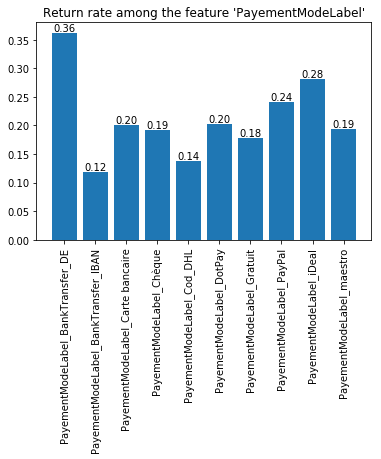

In [17]:
PayementModeLabel_return, PayementModeLabel_not_return, x_label = num_return(17, 26)    
x = range(len(x_label))
Y = PayementModeLabel_return/(PayementModeLabel_not_return + PayementModeLabel_return)
plt.bar(x, Y)
plt.xticks(x, x_label, rotation=90)
plt.title("Return rate among the feature 'PayementModeLabel'")
for x, y in zip(x, Y):
    plt.text(x , y , '%.2f' % y, ha='center', va='bottom')
plt.savefig('payementmodellabel.png', bbox_inches='tight')
plt.show()

## UpperMaterialLabel

In [18]:
X_train_final['UpperMaterialLabel'].count()

82114

In [19]:
X_train_final['UpperMaterialLabel'].value_counts() 

Cuir                   29774
Nubuck                 21968
Textile                 8542
Cuir/Textile            6338
Synth??tique            5748
Cuir verni              5237
Cuir / Synth??tique     4110
Caoutchouc               386
Fourrure v??ritable       11
Name: UpperMaterialLabel, dtype: int64

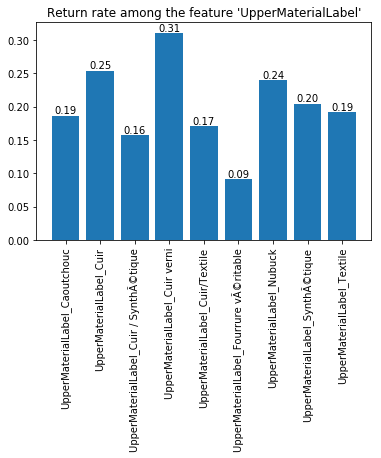

In [20]:
UpperMaterialLabel_return, UpperMaterialLabel_not_return, x_label = num_return(181, 189)    
x = range(len(x_label))
Y = UpperMaterialLabel_return/(UpperMaterialLabel_not_return + UpperMaterialLabel_return)
plt.bar(x, Y)
plt.xticks(x, x_label, rotation=90)
plt.title("Return rate among the feature 'UpperMaterialLabel'")
for x, y in zip(x, Y):
    plt.text(x , y , '%.2f' % y, ha='center', va='bottom')
plt.savefig('uppermateriallabel.png', bbox_inches='tight')
plt.show()

## Iso code

In [21]:
X_train_final['IsoCode'].count()

1067290

In [22]:
X_train_final['IsoCode'].value_counts()

FR    882181
DE     37600
BE     28845
NL     28730
GB     26152
ES     22582
IT     17714
PL      9163
DK      5957
SE      4733
LU      1376
AT       548
FI       456
GR       294
IE       237
PT       208
RO       135
CZ       127
SK        53
SI        47
HU        37
LT        34
EE        30
BG        29
LV        22
Name: IsoCode, dtype: int64

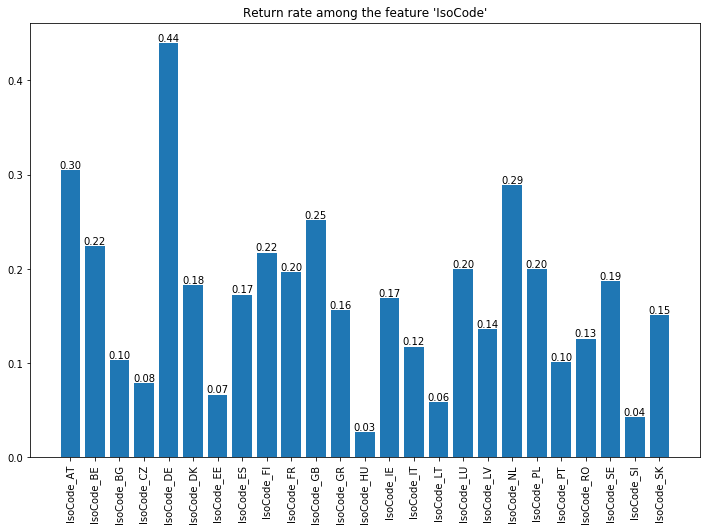

In [23]:
IsoCode_return, IsoCode_not_return, x_label = num_return(29, 53)    
x = range(len(x_label))
Y = IsoCode_return/(IsoCode_return+IsoCode_not_return)
plt.figure(figsize=(12, 8))
plt.bar(x, Y)
plt.xticks(x, x_label, rotation=90)
plt.title("Return rate among the feature 'IsoCode'")
for x, y in zip(x, Y):
    plt.text(x , y , '%.2f' % y, ha='center', va='bottom')
plt.savefig('isocode.png', bbox_inches='tight')
plt.show()

## Product Type

In [24]:
X_train_final['ProductType'].count()

687194

In [25]:
X_train_final['ProductType'].value_counts() 

Baskets                    181070
Sandales et nu-pieds       102918
Bottines et boots           93170
Ballerines                  53163
Escarpins                   48495
Chaussures ?? lacets        40245
Chaussures de sport         39761
Bottes                      31906
Tongs                       28287
Mocassins                   17830
Sacs ?? main                 9390
Mules et sabots              9330
Chaussons                    7635
Chaussures ?? scratch        5752
Espadrilles                  5553
Produits d'entretien         4020
Petite Maroquinerie          1978
Semelles                     1317
Sacs pochettes               1036
Sacs ?? dos                   891
Sacs homme                    761
Sacs de sport                 601
Lacets                        529
Bagages                       482
Scolaire                      284
Chaussettes et collants       279
Ceintures                     247
Business                      107
Sacs ordinateur                71
Isotherme     

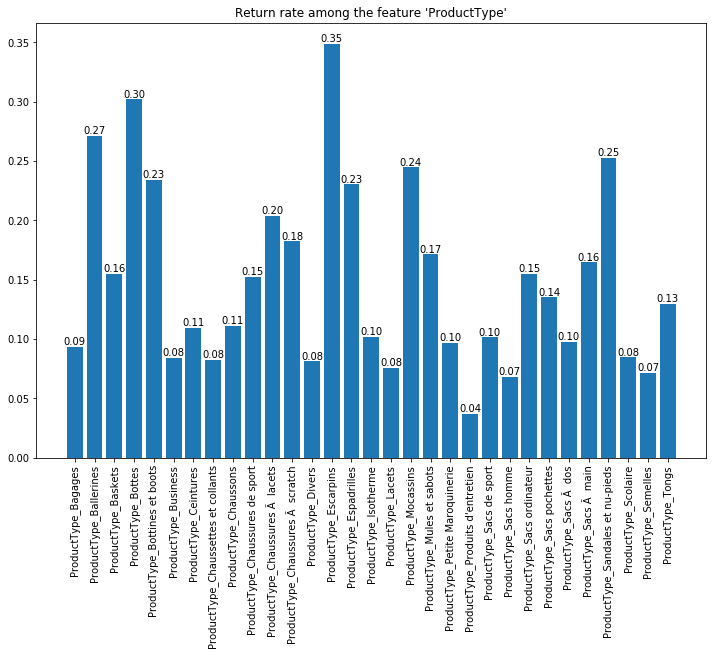

In [26]:
ProductType_return, ProductType_not_return, x_label = num_return(101, 131) 
x = range(len(x_label))
Y= ProductType_return/(ProductType_return+ProductType_not_return)
plt.figure(figsize=(12, 8))
plt.bar(x, Y)
plt.xticks(x, x_label, rotation=90)
plt.title("Return rate among the feature 'ProductType'")
for x, y in zip(x, Y):
    plt.text(x , y , '%.2f' % y, ha='center', va='bottom')
plt.savefig('producttype.png', bbox_inches='tight')
plt.show()
All_return, All_not_return, x_label_all = num_return(0, items_return.shape[1]-1)

# Continuous data

## TotalLineItems

In [27]:
X_train_final['TotalLineItems'].value_counts()[:10]

1     593805
2     256860
3     106597
4      52164
5      24724
6      12909
7       6968
8       4475
9       2582
10      1516
Name: TotalLineItems, dtype: int64

In [28]:
X_others = pd.DataFrame(columns=['TotalLineItems'], data = X_train_final['TotalLineItems'])
X_others['UnitPMPEUR'] = X_train_final['UnitPMPEUR']
X_others['OrderInterval'] = X_train_final['OrderInterval']
X_others['OrderCreationAge'] = X_train_final['OrderCreationAge']
items_return = X_others.drop(index_return)
items_not_return = X_others.drop(index_not_return)

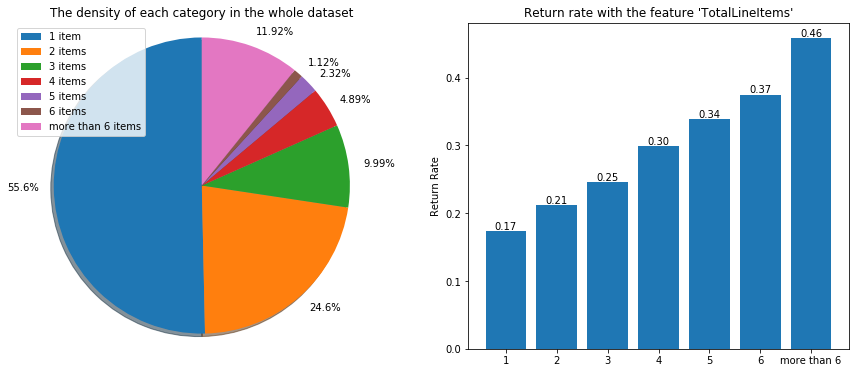

In [29]:
num_return = []
num_return.append(items_return[items_return['TotalLineItems']==1]['TotalLineItems'].describe()[0])
num_return.append(items_return[items_return['TotalLineItems']==2]['TotalLineItems'].describe()[0])
num_return.append(items_return[items_return['TotalLineItems']==3]['TotalLineItems'].describe()[0])
num_return.append(items_return[items_return['TotalLineItems']==4]['TotalLineItems'].describe()[0])
num_return.append(items_return[items_return['TotalLineItems']==5]['TotalLineItems'].describe()[0])
num_return.append(items_return[items_return['TotalLineItems']==6]['TotalLineItems'].describe()[0])
num_return.append(items_return[items_return['TotalLineItems']>=7]['TotalLineItems'].describe()[0])
num_return = np.array(num_return)

num_not_return = []
num_not_return.append(items_not_return[items_not_return['TotalLineItems']==1]['TotalLineItems'].describe()[0])
num_not_return.append(items_not_return[items_not_return['TotalLineItems']==2]['TotalLineItems'].describe()[0])
num_not_return.append(items_not_return[items_not_return['TotalLineItems']==3]['TotalLineItems'].describe()[0])
num_not_return.append(items_not_return[items_not_return['TotalLineItems']==4]['TotalLineItems'].describe()[0])
num_not_return.append(items_not_return[items_not_return['TotalLineItems']==5]['TotalLineItems'].describe()[0])
num_not_return.append(items_not_return[items_not_return['TotalLineItems']==6]['TotalLineItems'].describe()[0])
num_not_return.append(items_not_return[items_not_return['TotalLineItems']>=7]['TotalLineItems'].describe()[0])
num_not_return = np.array(num_not_return)

plt.figure(figsize=(15,6))
plt.subplot(121)
def autopct_more_than(pct):
    return ('%1.f%%' % pct) if pct > 5 else ''

labels = ['1 item', '2 items', '3 items', '4 items', '5 items', '6 items', 'more than 6 items']
sizes = [55.6, 24.6, 9.99, 4.89, 2.32, 1.12, 11.92]
explode = (0, 0, 0.1, 0.1, 0.1,0.1,0 )  # explode 1st slice
percent = ['55.6%', '24.6%', '9.99%', '4.89%', '2.32%', '1.12%', '11.92%']
legends = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, sizes)]

a = plt.pie(sizes,labels = percent, shadow=True, startangle=90)
print(len(a))
plt.legend(a[0], labels,loc='low center')
plt.title("")
plt.axis('equal')
plt.title("The density of each category in the whole dataset")

plt.subplot(122)

plt.bar(np.arange(0, len(num_return)), num_return/(num_return+num_not_return))
plt.ylabel("Return Rate")
x_label = ['1','2','3','4','5','6','more than 6']
x = range(len(x_label))
plt.xticks(x, x_label)
for x, y in zip(x, num_return/(num_return+num_not_return)):
    plt.text(x , y , '%.2f' % y, ha='center', va='bottom')
plt.title("Return rate with the feature 'TotalLineItems'")


plt.savefig('totallineitems.png', bbox_inches='tight')
plt.show()

## UnitPMPEUR

In [30]:
X_train_final['UnitPMPEUR'].describe()

count    1.067290e+06
mean     2.983289e+01
std      2.038624e+01
min      0.000000e+00
25%      1.680000e+01
50%      2.595000e+01
75%      3.794420e+01
max      1.100000e+03
Name: UnitPMPEUR, dtype: float64

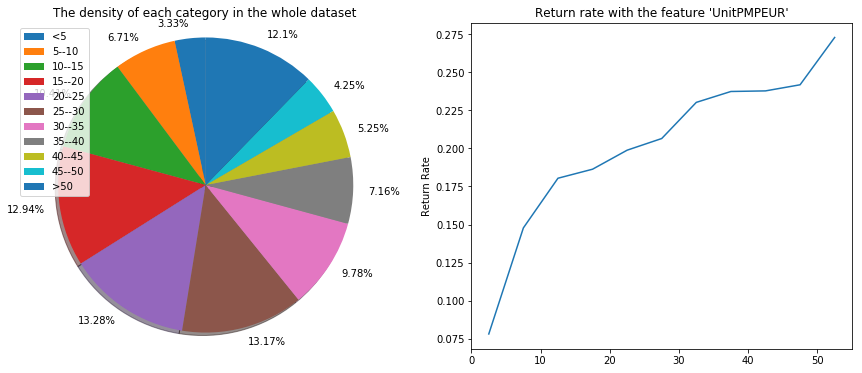

In [31]:
num_return = []
num_return.append(items_return[items_return['UnitPMPEUR']<=5.0]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=10.0)&(items_return['UnitPMPEUR']>5.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=15.0)&(items_return['UnitPMPEUR']>10.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=20.0)&(items_return['UnitPMPEUR']>15.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=25.0)&(items_return['UnitPMPEUR']>20.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=30.0)&(items_return['UnitPMPEUR']>25.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=35.0)&(items_return['UnitPMPEUR']>30.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=40.0)&(items_return['UnitPMPEUR']>35.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=45.0)&(items_return['UnitPMPEUR']>40.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[(items_return['UnitPMPEUR']<=50.0)&(items_return['UnitPMPEUR']>45.0)]['UnitPMPEUR'].describe()[0])
num_return.append(items_return[items_return['UnitPMPEUR']>50.0]['UnitPMPEUR'].describe()[0])
num_return = np.array(num_return)

num_not_return = []
num_not_return.append(items_not_return[items_not_return['UnitPMPEUR']<=5.0]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=10.0)&(items_not_return['UnitPMPEUR']>5.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=15.0)&(items_not_return['UnitPMPEUR']>10.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=20.0)&(items_not_return['UnitPMPEUR']>15.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=25.0)&(items_not_return['UnitPMPEUR']>20.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=30.0)&(items_not_return['UnitPMPEUR']>25.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=35.0)&(items_not_return['UnitPMPEUR']>30.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=40.0)&(items_not_return['UnitPMPEUR']>35.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=45.0)&(items_not_return['UnitPMPEUR']>40.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['UnitPMPEUR']<=50.0)&(items_not_return['UnitPMPEUR']>45.0)]['UnitPMPEUR'].describe()[0])
num_not_return.append(items_not_return[items_not_return['UnitPMPEUR']>50.0]['UnitPMPEUR'].describe()[0])
num_not_return = np.array(num_not_return)

plt.figure(figsize=(15,6))
plt.subplot(121)
def autopct_more_than(pct):
    return ('%1.f%%' % pct) if pct > 5 else ''

labels = ['<5','5--10','10--15','15--20','20--25','25--30','30--35','35--40','40--45','45--50','>50']
sizes = [3.33,6.71,10.41,12.94,13.28,13.17,9.78,7.16,5.25,4.25,12.1]
explode = (0, 0, 0.1, 0.1, 0.1,0.1,0 )  
percent = ['3.33%','6.71%','10.41%','12.94%','13.28%','13.17%','9.78%','7.16%','5.25%','4.25%','12.1%']
legends = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, sizes)]

a = plt.pie(sizes,labels = percent, shadow=True, startangle=90)
print(len(a))
plt.legend(a[0], labels,loc='low center')
plt.title("")
plt.axis('equal')
plt.title("The density of each category in the whole dataset")

plt.subplot(122)

x_label = [2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5,47.5,52.5]
plt.plot(x_label, num_return/(num_return+num_not_return))
plt.ylabel("Return Rate")
plt.title("Return rate with the feature 'UnitPMPEUR'")
plt.savefig('unitpmpeur.png', bbox_inches='tight')
plt.show()

## OrderInterval

In [32]:
X_train_final['OrderInterval'].describe()

count    790413.000000
mean        375.034163
std         503.308268
min           0.000000
25%           0.000000
50%         118.000000
75%         639.000000
max        2849.000000
Name: OrderInterval, dtype: float64

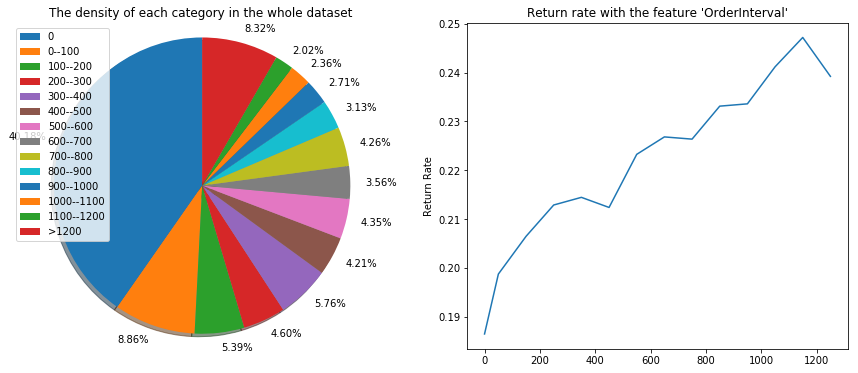

In [33]:
num_return = []
num_return.append(items_return[items_return['OrderInterval']==0.0]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=100.0)&(items_return['OrderInterval']>0.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=200.0)&(items_return['OrderInterval']>100.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=300.0)&(items_return['OrderInterval']>200.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=400.0)&(items_return['OrderInterval']>300.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=500.0)&(items_return['OrderInterval']>400.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=600.0)&(items_return['OrderInterval']>500.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=700.0)&(items_return['OrderInterval']>600.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=800.0)&(items_return['OrderInterval']>700.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=900.0)&(items_return['OrderInterval']>800.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=1000.0)&(items_return['OrderInterval']>900.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=1100.0)&(items_return['OrderInterval']>1000.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[(items_return['OrderInterval']<=1200.0)&(items_return['OrderInterval']>1100.0)]['OrderInterval'].describe()[0])
num_return.append(items_return[items_return['OrderInterval']>1200.0]['OrderInterval'].describe()[0])
num_return = np.array(num_return)

num_not_return = []
num_not_return.append(items_not_return[items_not_return['OrderInterval']==0.0]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=100.0)&(items_not_return['OrderInterval']>0.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=200.0)&(items_not_return['OrderInterval']>100.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=300.0)&(items_not_return['OrderInterval']>200.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=400.0)&(items_not_return['OrderInterval']>300.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=500.0)&(items_not_return['OrderInterval']>400.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=600.0)&(items_not_return['OrderInterval']>500.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=700.0)&(items_not_return['OrderInterval']>600.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=800.0)&(items_not_return['OrderInterval']>700.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=900.0)&(items_not_return['OrderInterval']>800.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=1000.0)&(items_not_return['OrderInterval']>900.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=1100.0)&(items_not_return['OrderInterval']>1000.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderInterval']<=1200.0)&(items_not_return['OrderInterval']>1100.0)]['OrderInterval'].describe()[0])
num_not_return.append(items_not_return[items_not_return['OrderInterval']>1200.0]['OrderInterval'].describe()[0])
num_not_return = np.array(num_not_return)

plt.figure(figsize=(15,6))
plt.subplot(121)
def autopct_more_than(pct):
    return ('%1.f%%' % pct) if pct > 5 else ''

labels = ['0','0--100','100--200','200--300','300--400','400--500','500--600','600--700','700--800','800--900','900--1000','1000--1100','1100--1200','>1200']
sizes = [40.18,8.86,5.39,4.60,5.76,4.21,4.35,3.56,4.26,3.13,2.71,2.36,2.02,8.32]
explode = (0, 0, 0.1, 0.1, 0.1,0.1,0 )  # explode 1st slice
percent = ['40.18%','8.86%','5.39%','4.60%','5.76%','4.21%','4.35%','3.56%','4.26%','3.13%','2.71%','2.36%','2.02%','8.32%']
legends = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, sizes)]

a = plt.pie(sizes,labels = percent, shadow=True, startangle=90)
print(len(a))
plt.legend(a[0], labels,loc='low center')
plt.title("")
plt.axis('equal')
plt.title("The density of each category in the whole dataset")

plt.subplot(122)
x_label = [0,50,150,250,350,450,550,650,750,850,950,1050,1150,1250]
plt.plot(x_label, num_return/(num_return+num_not_return))
plt.ylabel("Return Rate")
plt.title("Return rate with the feature 'OrderInterval'")
plt.savefig('orderinterval.png', bbox_inches='tight')
plt.show()

## OrderCreationAge

In [34]:
X_train_final['OrderCreationAge'].describe()

count    790413.000000
mean         37.349134
std          11.595880
min          -4.000000
25%          30.000000
50%          37.000000
75%          44.000000
max         245.000000
Name: OrderCreationAge, dtype: float64

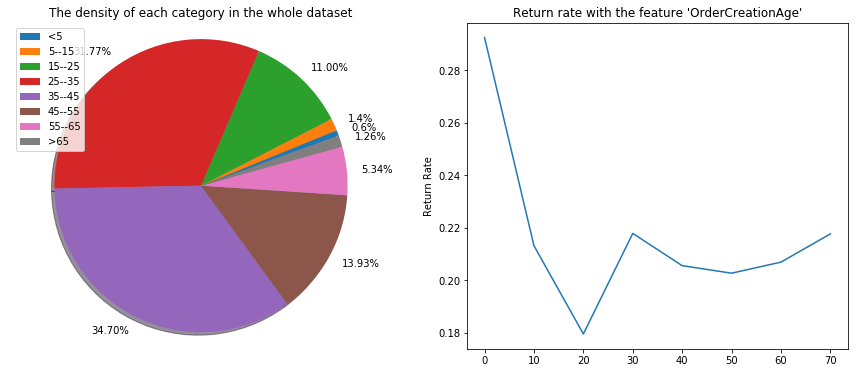

In [35]:
num_return = []
num_return.append(items_return[items_return['OrderCreationAge']<5.0]['OrderCreationAge'].describe()[0])
num_return.append(items_return[(items_return['OrderCreationAge']<=15.0)&(items_return['OrderCreationAge']>5.0)]['OrderCreationAge'].describe()[0])
num_return.append(items_return[(items_return['OrderCreationAge']<=25.0)&(items_return['OrderCreationAge']>15.0)]['OrderCreationAge'].describe()[0])
num_return.append(items_return[(items_return['OrderCreationAge']<=35.0)&(items_return['OrderCreationAge']>25.0)]['OrderCreationAge'].describe()[0])
num_return.append(items_return[(items_return['OrderCreationAge']<=45.0)&(items_return['OrderCreationAge']>35.0)]['OrderCreationAge'].describe()[0])
num_return.append(items_return[(items_return['OrderCreationAge']<=55.0)&(items_return['OrderCreationAge']>45.0)]['OrderCreationAge'].describe()[0])
num_return.append(items_return[(items_return['OrderCreationAge']<=65.0)&(items_return['OrderCreationAge']>55.0)]['OrderCreationAge'].describe()[0])
num_return.append(items_return[items_return['OrderCreationAge']>65.0]['OrderCreationAge'].describe()[0])
num_return = np.array(num_return)

num_not_return = []
num_not_return.append(items_not_return[items_not_return['OrderCreationAge']<5.0]['OrderCreationAge'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderCreationAge']<=15.0)&(items_not_return['OrderCreationAge']>5.0)]['OrderCreationAge'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderCreationAge']<=25.0)&(items_not_return['OrderCreationAge']>15.0)]['OrderCreationAge'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderCreationAge']<=35.0)&(items_not_return['OrderCreationAge']>25.0)]['OrderCreationAge'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderCreationAge']<=45.0)&(items_not_return['OrderCreationAge']>35.0)]['OrderCreationAge'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderCreationAge']<=55.0)&(items_not_return['OrderCreationAge']>45.0)]['OrderCreationAge'].describe()[0])
num_not_return.append(items_not_return[(items_not_return['OrderCreationAge']<=65.0)&(items_not_return['OrderCreationAge']>55.0)]['OrderCreationAge'].describe()[0])
num_not_return.append(items_not_return[items_not_return['OrderCreationAge']>65.0]['OrderCreationAge'].describe()[0])
num_not_return = np.array(num_not_return)

plt.figure(figsize=(15,6))
plt.subplot(121)
def autopct_more_than(pct):
    return ('%1.f%%' % pct) if pct > 5 else ''

labels = ['<5','5--15','15--25','25--35','35--45','45--55','55--65','>65']
sizes = [0.62,1.36,11.00,31.77,34.70,13.93,5.34,1.26]
explode = (0, 0, 0.1, 0.1, 0.1,0.1,0 )  # explode 1st slice
percent = ['0.6%','1.4%','11.00%','31.77%','34.70%','13.93%','5.34%','1.26%']
legends = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, sizes)]

a = plt.pie(sizes,labels = percent, shadow=True, startangle=20)
print(len(a))
plt.legend(a[0], labels,loc='low center')
plt.title("")
plt.axis('equal')
plt.title("The density of each category in the whole dataset")

plt.subplot(122)
x_label = [0,10,20,30,40,50,60,70]
plt.plot(x_label, num_return/(num_return+num_not_return))
plt.ylabel("Return Rate")
plt.title("Return rate with the feature 'OrderCreationAge'")
plt.savefig('ordercreationage.png', bbox_inches='tight')
plt.show()

## The relation between two features

In [36]:
x_train_final = funk_mask_2(X_train_final)
items_return = x_train_final.drop(index_return)
items_not_return = x_train_final.drop(index_not_return)

In [37]:
X_return = transform(items_return[:1000])

In [38]:
patterns = pyfpgrowth.find_frequent_patterns(X_return, 970)
patterns

{(24,): 973,
 (24, 26): 973,
 (24, 26, 44): 973,
 (24, 26, 44, 87): 973,
 (24, 26, 44, 87, 261): 973,
 (24, 26, 44, 87, 261, 266): 973,
 (24, 26, 44, 87, 266): 973,
 (24, 26, 44, 261): 973,
 (24, 26, 44, 261, 266): 973,
 (24, 26, 44, 266): 973,
 (24, 26, 87): 973,
 (24, 26, 87, 261): 973,
 (24, 26, 87, 261, 266): 973,
 (24, 26, 87, 266): 973,
 (24, 26, 261): 973,
 (24, 26, 261, 266): 973,
 (24, 26, 266): 973,
 (24, 44): 973,
 (24, 44, 87): 973,
 (24, 44, 87, 261): 973,
 (24, 44, 87, 261, 266): 973,
 (24, 44, 87, 266): 973,
 (24, 44, 261): 973,
 (24, 44, 261, 266): 973,
 (24, 44, 266): 973,
 (24, 87): 973,
 (24, 87, 261): 973,
 (24, 87, 261, 266): 973,
 (24, 87, 266): 973,
 (24, 261): 973,
 (24, 261, 266): 973,
 (24, 266): 973,
 (26,): 1000,
 (26, 36): 970,
 (26, 36, 87): 970,
 (26, 36, 87, 261): 970,
 (26, 36, 87, 261, 266): 970,
 (26, 36, 87, 266): 970,
 (26, 36, 261): 970,
 (26, 36, 261, 266): 970,
 (26, 36, 266): 970,
 (26, 44): 973,
 (26, 44, 87): 973,
 (26, 44, 87, 261): 973,
 (26

The preparation of the hole data for fp-growth algorithm would take a very long time. Here, we just take the first 1000 items to show that this algorithm is much influenced by the quantity of the label.

In [39]:
x_train_final = funk_mask_3(X_train_final)
items_return = x_train_final.drop(index_return)
items_not_return = x_train_final.drop(index_not_return)

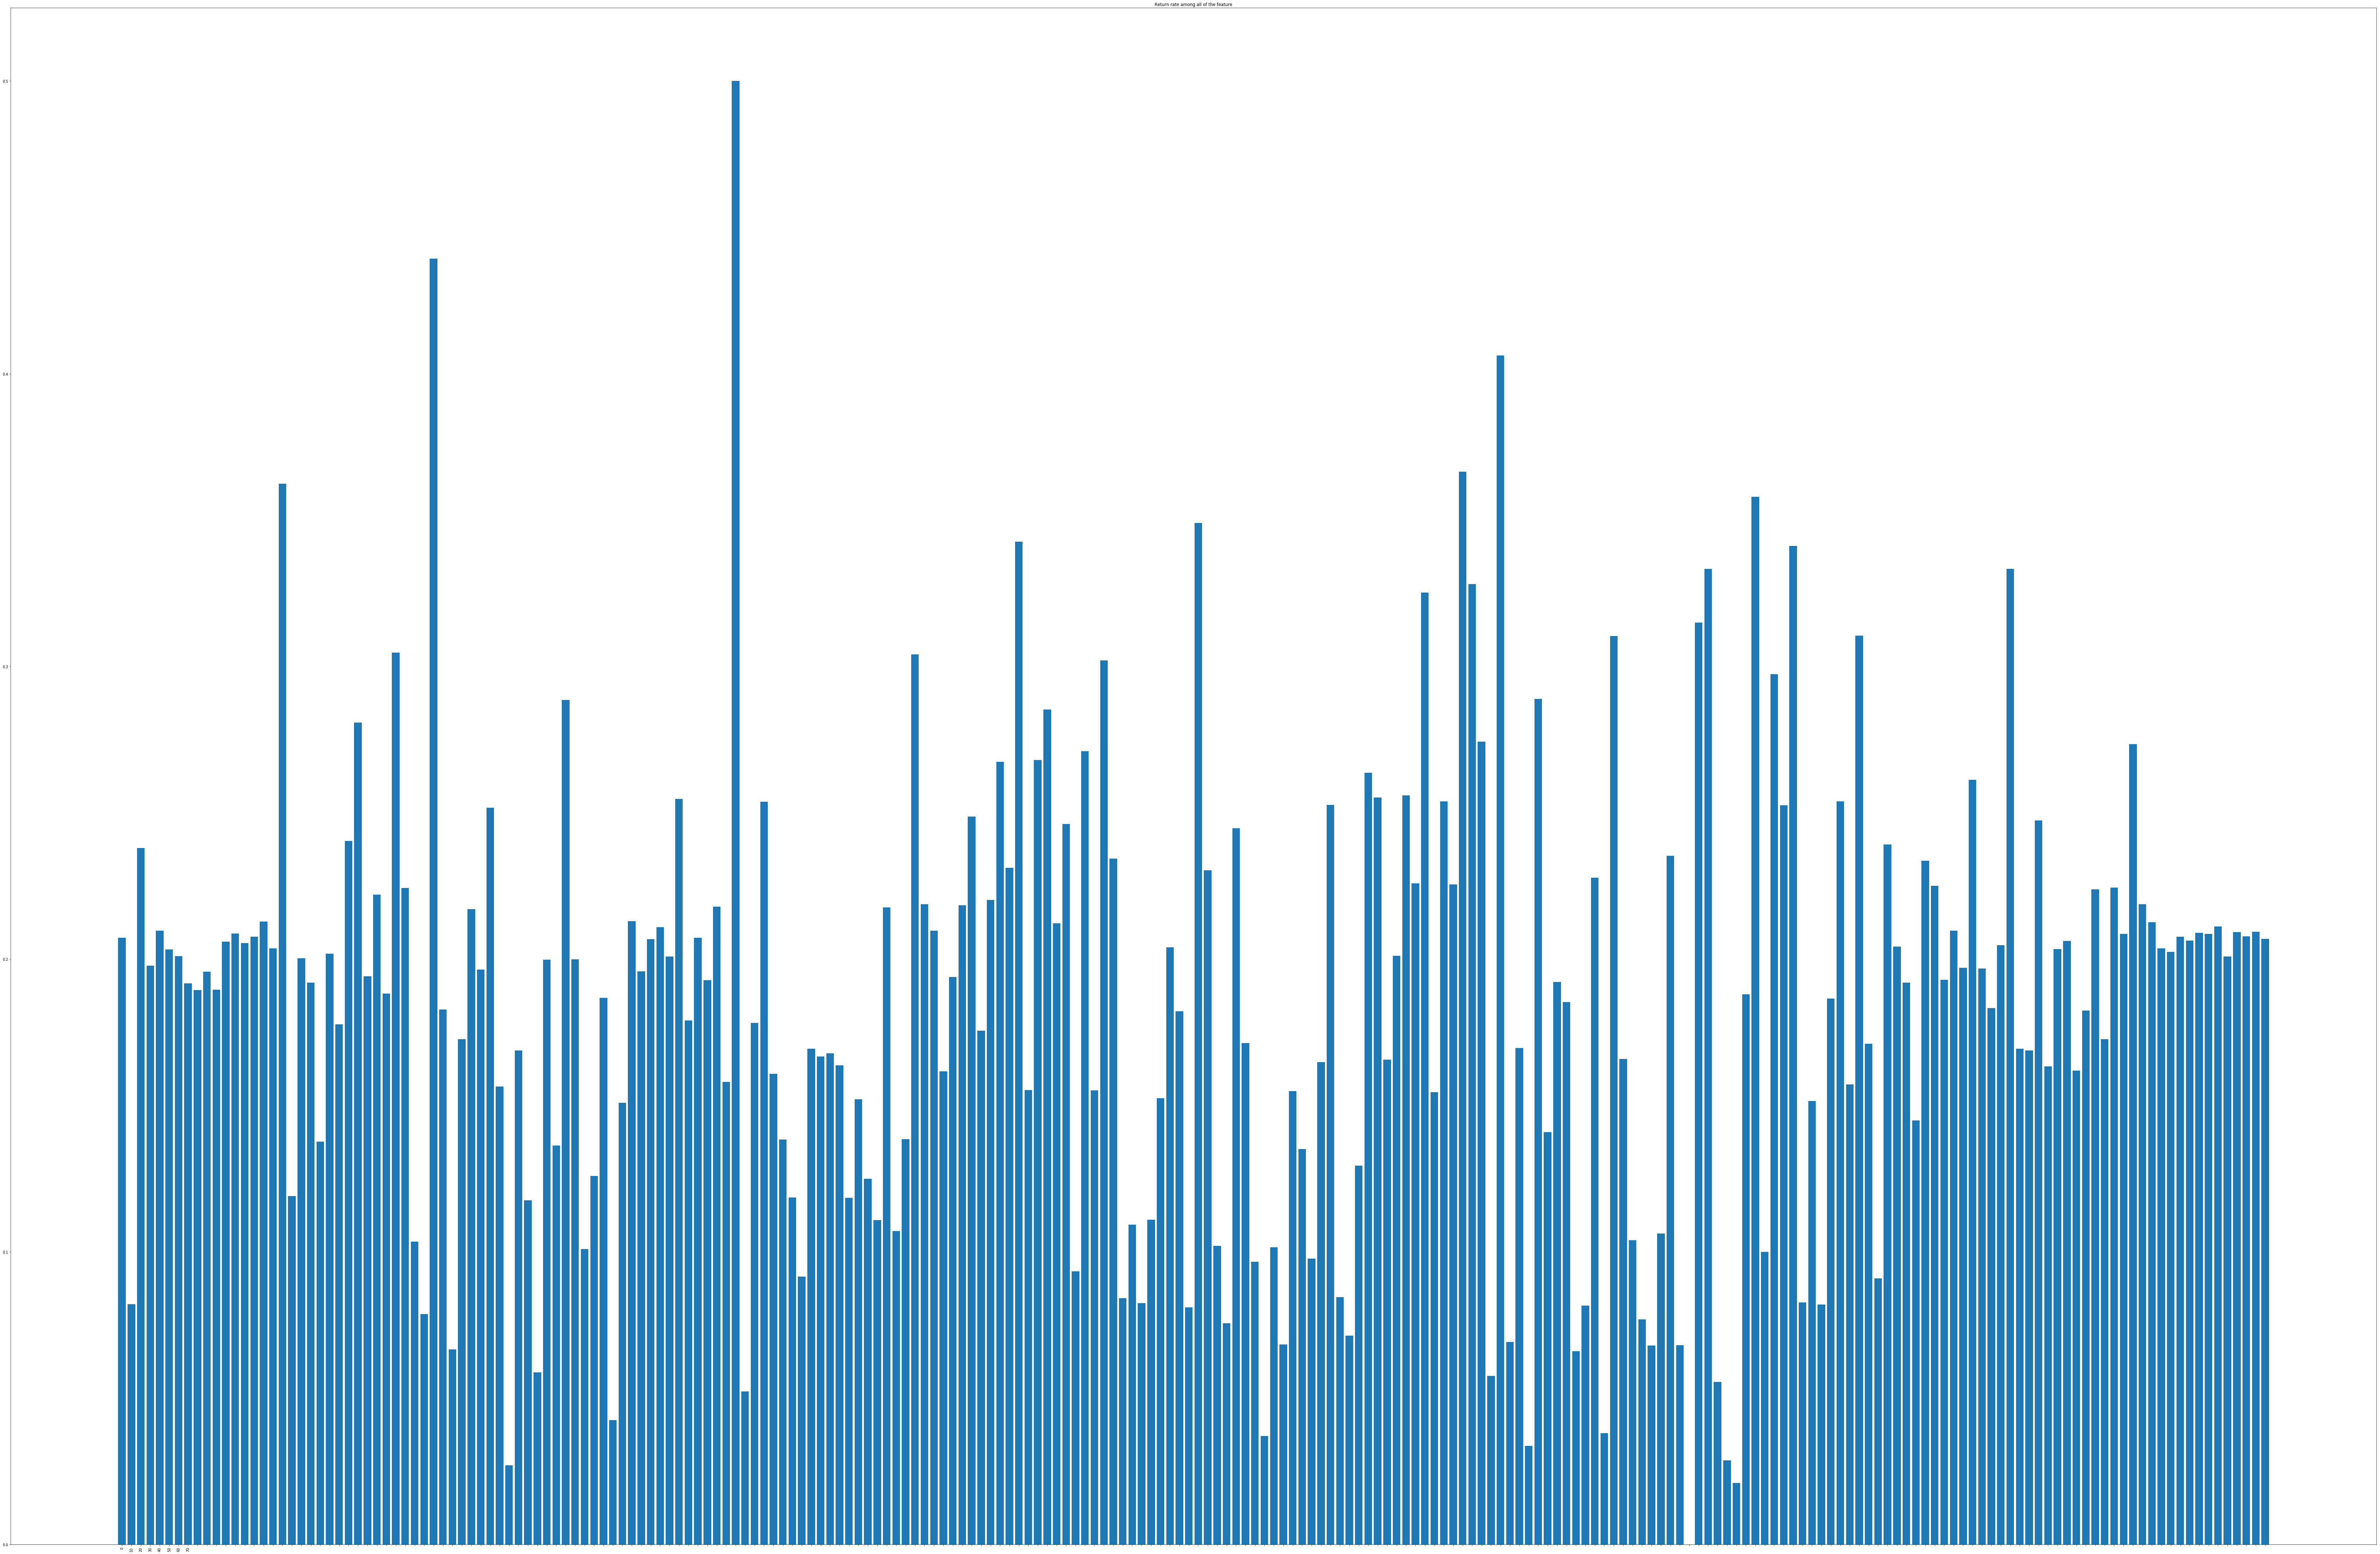

In [40]:
x = range(len(x_label_all))
plt.figure(figsize=(120, 80))
plt.bar(x, All_return/(All_return+All_not_return))
plt.xticks(x, x_label, rotation=90)
plt.title("Return rate among all of the feature")
plt.savefig('all.png', bbox_inches='tight')
plt.show()

In [41]:
rate = All_return/(All_return+All_not_return)
index = []
for i in np.arange(0, rate.size):
    if rate[i] > 0.3:
        index.append(i)
items_return.columns[index]

Index([u'PayementModeLabel_BankTransfer_DE', u'IsoCode_AT', u'IsoCode_DE',
       u'Gender_NC', u'MarketTargetLabel_contemporain',
       u'UniverseLabel_Soir??e', u'ProductType_Bottes',
       u'ProductType_Escarpins', u'SubtypeLabel_Babies',
       u'SubtypeLabel_Bout ouvert', u'SubtypeLabel_Bout pointu',
       u'SubtypeLabel_Cavali?¨res', u'SubtypeLabel_Low boots',
       u'SubtypeLabel_Salom??s', u'SubtypeLabel_Santiags',
       u'SubtypeLabel_Stretch', u'SubtypeLabel_Talon fin et aiguille',
       u'UpperMaterialLabel_Cuir verni', u'OutSoleMaterialLabel_Bois'],
      dtype='object')

We chose 20 features with the higher return rates

In [42]:
num = []
for i in np.arange(0, len(index)):
    num.append(items_return[items_return.columns[index][i]].value_counts()[1])

In [43]:
index2 = []
index3 = []
for i in np.arange(0, len(num)):
    if (num[i]>1000 and num[i]<5000):
        index2.append(i)
    if (num[i]>5000 and num[i]<20000):
        index3.append(i)
df0 = pd.DataFrame(columns=[items_return.columns[index][0]], data = items_return[items_return.columns[index][0]])
for i in np.arange(1, len(index)):
    df0[items_return.columns[index][i]] = items_return[items_return.columns[index][i]]

In [44]:
def create_df(index):
    df = pd.DataFrame(columns=[df0.columns[index][0]], data = df0[df0.columns[index][0]])
    for i in np.arange(1, len(index)):
        df[df0.columns[index][i]] = df0[df0.columns[index][i]]
    return df

In [45]:
df2 = create_df(index2)
df3 = create_df(index3)

In [46]:
X_return = transform(df2)
patterns = pyfpgrowth.find_frequent_patterns(X_return, 200)
patterns

{(0,): 2551, (1,): 3227, (2,): 1626}

They don't have relation

In [47]:
X_return = transform(df3)
patterns = pyfpgrowth.find_frequent_patterns(X_return, 2000)
patterns

{(0,): 16520, (0, 2): 2098, (1,): 9636, (2,): 16925, (2, 3): 3327, (3,): 5301}

Around 60% of the label “SubtypeLabel_Bout pointu” together along with the label “ProductType_Escarpins” in the returned items. We will exam these two label in the no-returned items.

In [48]:
df_test = pd.DataFrame(columns=['ProductType_Escarpins'], data = items_not_return['ProductType_Escarpins'])
df_test['SubtypeLabel_Bout pointu'] = items_not_return['SubtypeLabel_Bout pointu']
X_return_test = transform(df_test)
patterns_test = pyfpgrowth.find_frequent_patterns(X_return_test, 2000)
patterns_test

{(0,): 31570, (0, 1): 6120, (1,): 10854}

The percentage of those two labels appear together  is not far from 60%. So the combination of these two labels don’t influence much on the return rate. 